In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

import os
print(os.listdir(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input"))

['test.csv', 'train.csv']


In [2]:
train = (pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv"))
print(train.shape)
test = (pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv"))
print(test.shape)

(7352, 563)
(2947, 563)


In [3]:
train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


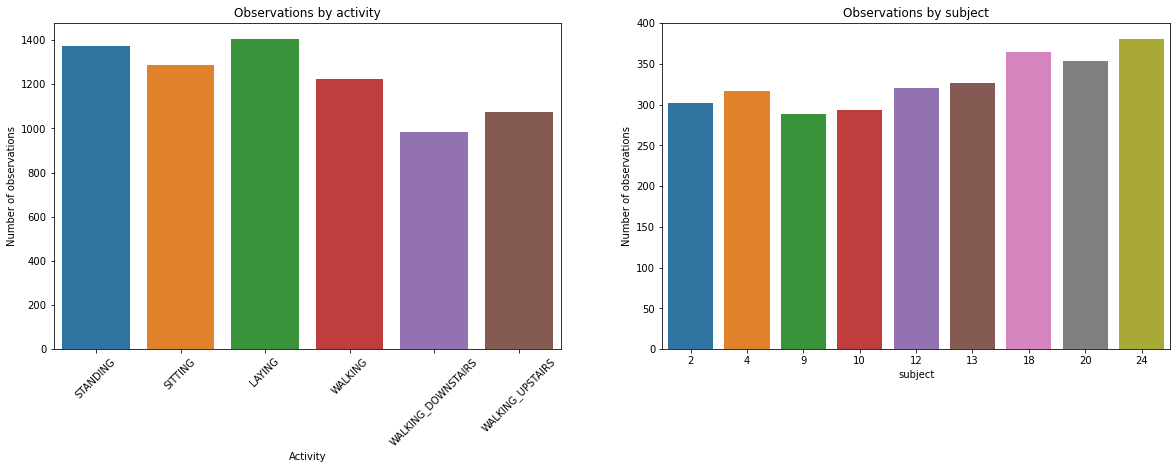

In [4]:
fig, ax = plt.subplots(ncols=2, figsize = (20,6))

sns.countplot(train['Activity'], ax=ax[0])
sns.countplot(test['subject'], ax=ax[1])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Number of observations')
ax[0].set_title('Observations by activity')
ax[1].set_ylabel('Number of observations')
ax[1].set_title('Observations by subject')

plt.show()

In [5]:
#Create the binary class variables for train set:
laying = []
for i in range(len(train)):
    if train['Activity'][i] == "LAYING":
        laying.append(1)
    else:
        laying.append(-1)
#train['LAYING'] = laying
train_laying = np.c_[laying]

sitting = []
for i in range(len(train)):
    if train['Activity'][i] == "SITTING":
        sitting.append(1)
    else:
        sitting.append(-1)
#train['SITTING'] = sitting
train_sitting = np.c_[sitting]

standing = []
for i in range(len(train)):
    if train['Activity'][i] == "STANDING":
        standing.append(1)
    else:
        standing.append(-1)
#train['STANDING'] = standing
train_standing = np.c_[standing]

walking = []
for i in range(len(train)):
    if train['Activity'][i] == "WALKING":
        walking.append(1)
    else:
        walking.append(-1)
#train['WALKING'] = walking
train_walking = np.c_[walking]

walkingdownstairs = []
for i in range(len(train)):
    if train['Activity'][i] == "WALKING_DOWNSTAIRS":
        walkingdownstairs.append(1)
    else:
        walkingdownstairs.append(-1)
#train['WALKING_DOWNSTAIRS'] = walkingdownstairs
train_walkingdownstairs = np.c_[walkingdownstairs]

walkingupstairs = []
for i in range(len(train)):
    if train['Activity'][i] == "WALKING_UPSTAIRS":
        walkingupstairs.append(1)
    else:
        walkingupstairs.append(-1)
#train['WALKING_UPSTAIRS'] = walkingupstairs
train_walkingupstairs = np.c_[walkingupstairs]

#Create the binary class variables for test set:
test_laying = []
for i in range(len(test)):
    if test['Activity'][i] == "LAYING":
        test_laying.append(1)
    else:
        test_laying.append(-1)
#test['LAYING'] = laying
test_laying = np.c_[test_laying]

test_sitting = []
for i in range(len(test)):
    if test['Activity'][i] == "SITTING":
        test_sitting.append(1)
    else:
        test_sitting.append(-1)
#test['SITTING'] = sitting
test_sitting = np.c_[test_sitting]

test_standing = []
for i in range(len(test)):
    if test['Activity'][i] == "STANDING":
        test_standing.append(1)
    else:
        test_standing.append(-1)
#test['STANDING'] = standing
test_standing = np.c_[test_standing]

test_walking = []
for i in range(len(test)):
    if test['Activity'][i] == "WALKING":
        test_walking.append(1)
    else:
        test_walking.append(-1)
#test['WALKING'] = walking
test_walking = np.c_[test_walking]

test_walkingdownstairs = []
for i in range(len(test)):
    if test['Activity'][i] == "WALKING_DOWNSTAIRS":
        test_walkingdownstairs.append(1)
    else:
        test_walkingdownstairs.append(-1)
#test['WALKING_DOWNSTAIRS'] = walkingdownstairs
test_walkingdownstairs = np.c_[test_walkingdownstairs]

test_walkingupstairs = []
for i in range(len(test)):
    if test['Activity'][i] == "WALKING_UPSTAIRS":
        test_walkingupstairs.append(1)
    else:
        test_walkingupstairs.append(-1)
#test['WALKING_UPSTAIRS'] = walkingupstairs
test_walkingupstairs = np.c_[test_walkingupstairs]


In [6]:
train_y = np.hstack((train_laying, train_sitting, train_standing, train_walking,train_walkingdownstairs,  train_walkingupstairs))
train_y

array([[-1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1]])

In [7]:
test_y = np.hstack((test_laying, test_sitting, test_standing, test_walking,test_walkingdownstairs,  test_walkingupstairs))
test_y

array([[-1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1]])

In [8]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
#Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
#Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")


Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 



## Least Square 

In [26]:
w_laying = np.linalg.inv(X_train.T@X_train)@X_train.T@train_laying
w_sitting = np.linalg.inv(X_train.T@X_train)@X_train.T@train_sitting
w_standing = np.linalg.inv(X_train.T@X_train)@X_train.T@train_standing
w_walking = np.linalg.inv(X_train.T@X_train)@X_train.T@train_walking
w_walkingdownstairs = np.linalg.inv(X_train.T@X_train)@X_train.T@train_walkingdownstairs
w_walkingupstairs = np.linalg.inv(X_train.T@X_train)@X_train.T@train_walkingupstairs

In [27]:
w_laying = np.matrix(w_laying)
w_sitting = np.matrix(w_sitting)
w_standing = np.matrix(w_standing)
w_walking = np.matrix(w_walking)
w_walkingdownstairs = np.matrix(w_walkingdownstairs)
w_walkingupstairs = np.matrix(w_walkingupstairs)

In [28]:
test_laying_pred = np.sign(X_test@w_laying)
test_sitting_pred = np.sign(X_test@w_sitting)
test_standing_pred = np.sign(X_test@w_standing)
test_walking_pred = np.sign(X_test@w_walking)
test_walkingdownstairs_pred = np.sign(X_test@w_walkingdownstairs)
test_walkingupstairs_pred = np.sign(X_test@w_walkingupstairs)

error_vec_laying = [0 if j[0]==j[1] else 1 for j in np.hstack((test_laying_pred, test_laying))]
print(sum(error_vec_laying)/len(test))

error_vec_sitting = [0 if j[0]==j[1] else 1 for j in np.hstack((test_sitting_pred, test_sitting))]
print(sum(error_vec_sitting)/len(test))

error_vec_standing = [0 if j[0]==j[1] else 1 for j in np.hstack((test_standing_pred, test_standing))]
print(sum(error_vec_standing)/len(test))

error_vec_walking = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walking_pred, test_walking))]
print(sum(error_vec_walking)/len(test))

error_vec_walkingdownstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingdownstairs_pred, test_walkingdownstairs))]
print(sum(error_vec_walkingdownstairs)/len(test))

error_vec_walkingupstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingupstairs_pred, test_walkingupstairs))]
print(sum(error_vec_walkingupstairs)/len(test))

0.6179165252799457
0.6868001357312521
0.6949440108585002
0.2680692229385816
0.5256192738378012
0.2646759416355616


In [41]:
test_laying_pred = X_test@w_laying
test_sitting_pred = X_test@w_sitting
test_standing_pred = X_test@w_standing
test_walking_pred = X_test@w_walking
test_walkingdownstairs_pred = X_test@w_walkingdownstairs
test_walkingupstairs_pred = X_test@w_walkingupstairs

pred = np.hstack((test_laying_pred, test_sitting_pred, test_standing_pred, test_walking_pred, test_walkingdownstairs_pred, test_walkingupstairs_pred))

pred

array([[ 1.16331756e+52,  2.72245933e+52,  5.40820994e+52,
        -7.48116373e+52, -2.82046907e+51, -2.77484016e+52],
       [ 1.58473236e+52,  1.60739226e+52,  5.49689840e+52,
        -5.34832342e+52, -2.97120785e+52, -5.97170014e+52],
       [ 1.45420885e+52,  3.85924421e+52,  6.87502313e+52,
        -3.08136456e+51,  7.39131072e+52, -1.98890339e+52],
       ...,
       [-3.29028391e+52, -3.50350676e+52, -2.15706783e+52,
        -1.05305011e+53, -1.14657281e+53, -1.24031915e+53],
       [-2.37620604e+52, -2.24031185e+52, -1.50321054e+52,
        -8.86874437e+52, -7.15987613e+52, -8.72776163e+52],
       [-1.04624029e+51,  7.44960965e+50,  9.98655488e+51,
        -2.09442966e+52, -1.43720806e+52, -2.69971869e+52]])

In [42]:
for i in range(len(pred)):
    #ab = np.abs(pred[i])
    index = np.argmax(pred[i])
    if pred[i][index] < 0: 
        pred[i][index] = np.abs(pred[i][index])
    for j in range(6):
        if j != index:
            pred[i][j] = -1
            
pred

array([[-1.00000000e+00, -1.00000000e+00,  5.40820994e+52,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  5.49689840e+52,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00,  7.39131072e+52, -1.00000000e+00],
       ...,
       [-1.00000000e+00, -1.00000000e+00,  2.15706783e+52,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  1.50321054e+52,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  9.98655488e+51,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

In [43]:
pred = np.sign(pred)
pred

array([[-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1.],
       ...,
       [-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.]])

In [55]:
test_laying_pred = pred[:,0]
test_sitting_pred = pred[:,1]
test_standing_pred = pred[:,2]
test_walking_pred = pred[:,3]
test_walkingdownstairs_pred = pred[:,4]
test_walkingupstairs_pred = pred[:,5]

In [56]:
pred_label = ["UNKNOWN" for i in range(len(X_test))]

for i in range(len(pred_label)):
    if test_laying_pred[i] == 1:
        pred_label[i] = "LAYING"
    if test_sitting_pred[i] == 1:
        pred_label[i] = "SITTING"
    if test_standing_pred[i] == 1:
        pred_label[i] = "STANDING"
    if test_walking_pred[i] == 1:
        pred_label[i] = "WALKING"
    if test_walkingupstairs_pred[i] == 1:
        pred_label[i] = "WALKINGUPSTAIRS"
    if test_walkingdownstairs_pred[i] == 1:
        pred_label[i] = "WALKINGDOWNSTAIRS"

In [58]:
test_label = test['Activity'].values

error = 0
for i in range(len(pred_label)):
    if pred_label[i] != test_label[i]:
        error = error + 1

print(error)
print(error/len(test_label))

2448
0.8306752629793009


## Regularizer with ridge regression

In [60]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

lamb = [10**i for i in range(-10,10)]

for la in lamb:
    print(la)
    d=[]
    for k in range(len(s)):
        d.append(s[k] / (s[k]**2 + la))
    S = np.diag(d)
    print(S.shape)
    w_laying = VT.transpose()@S@U.transpose()@train_laying
    test_laying_pred = np.sign(X_test@w_laying)
    error_vec_laying = [0 if j[0]==j[1] else 1 for j in np.hstack((test_laying_pred, test_laying))]
    print(sum(error_vec_laying)/len(test))
    w_sitting = VT.transpose()@S@U.transpose()@train_sitting
    test_sitting_pred = np.sign(X_test@w_sitting)
    error_vec_sitting = [0 if j[0]==j[1] else 1 for j in np.hstack((test_sitting_pred, test_sitting))]
    print(sum(error_vec_sitting)/len(test))
    w_standing = VT.transpose()@S@U.transpose()@train_standing
    test_standing_pred = np.sign(X_test@w_standing)
    error_vec_sitting = [0 if j[0]==j[1] else 1 for j in np.hstack((test_standing_pred, test_standing))]
    print(sum(error_vec_standing)/len(test))
    w_walking = VT.transpose()@S@U.transpose()@train_walking
    test_walking_pred = np.sign(X_test@w_walking)
    error_vec_walking = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walking_pred, test_walking))]
    print(sum(error_vec_walking)/len(test))
    w_walkingdownstairs = VT.transpose()@S@U.transpose()@train_walkingdownstairs
    test_walkingdownstairs_pred = np.sign(X_test@w_walkingdownstairs)
    error_vec_walkingdownstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingdownstairs_pred, test_walkingdownstairs))]
    print(sum(error_vec_walkingdownstairs)/len(test))
    w_walkingupstairs = VT.transpose()@S@U.transpose()@train_walkingupstairs
    test_walkingupstairs_pred = np.sign(X_test@w_walkingupstairs)
    error_vec_walkingupstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingupstairs_pred, test_walkingupstairs))]
    print(sum(error_vec_walkingupstairs)/len(test))

1e-10
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.005429250084832033
0.009501187648456057
0.0166270783847981
1e-09
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.005429250084832033
0.009501187648456057
0.0166270783847981
1e-08
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.005429250084832033
0.009501187648456057
0.0166270783847981
1e-07
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.00508992195453003
0.009501187648456057
0.0166270783847981
1e-06
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.004750593824228029
0.009501187648456057
0.0166270783847981
1e-05
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.004750593824228029
0.009501187648456057
0.0166270783847981
0.0001
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.004750593824228029
0.009501187648456057
0.0166270783847981
0.001
(561, 561)
0.0
0.03189684424838819
0.6949440108585002
0.00508992195453003
0.009501187648456057
0.017305734645402103
0.01
(561, 561)
0.0
0.031218187

In [104]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

lamb = 0.001

d=[]
for k in range(len(s)):
    d.append(s[k] / (s[k]**2 + lamb))

S = np.diag(d)
print(S)

[[7.20405333e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.54231098e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.42681262e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.11476317e-12
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.21076613e-12 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.84572758e-13]]


In [105]:
#Ridge Regression for six different models
w_laying = VT.transpose()@S@U.transpose()@train_laying
w_sitting = VT.transpose()@S@U.transpose()@train_sitting
w_standing = VT.transpose()@S@U.transpose()@train_standing
w_walking = VT.transpose()@S@U.transpose()@train_walking
w_walkingdownstairs = VT.transpose()@S@U.transpose()@train_walkingdownstairs
w_walkingupstairs = VT.transpose()@S@U.transpose()@train_walkingupstairs


In [106]:
test_laying_pred = np.sign(X_test@w_laying)
test_sitting_pred = np.sign(X_test@w_sitting)
test_standing_pred = np.sign(X_test@w_standing)
test_walking_pred = np.sign(X_test@w_walking)
test_walkingdownstairs_pred = np.sign(X_test@w_walkingdownstairs)
test_walkingupstairs_pred = np.sign(X_test@w_walkingupstairs)


error_vec_laying = [0 if j[0]==j[1] else 1 for j in np.hstack((test_laying_pred, test_laying))]
print(sum(error_vec_laying)/len(test))

error_vec_sitting = [0 if j[0]==j[1] else 1 for j in np.hstack((test_sitting_pred, test_sitting))]
print(sum(error_vec_sitting)/len(test))

error_vec_standing = [0 if j[0]==j[1] else 1 for j in np.hstack((test_standing_pred, test_standing))]
print(sum(error_vec_standing)/len(test))

error_vec_walking = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walking_pred, test_walking))]
print(sum(error_vec_walking)/len(test))

error_vec_walkingdownstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingdownstairs_pred, test_walkingdownstairs))]
print(sum(error_vec_walkingdownstairs)/len(test))

error_vec_walkingupstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingupstairs_pred, test_walkingupstairs))]
print(sum(error_vec_walkingupstairs)/len(test))

# with ridge regression, our models do much better separately

0.0
0.03189684424838819
0.03630810994231422
0.00508992195453003
0.009501187648456057
0.017305734645402103


In [107]:
test_laying_pred = X_test@w_laying
test_sitting_pred = X_test@w_sitting
test_standing_pred = X_test@w_standing
test_walking_pred = X_test@w_walking
test_walkingdownstairs_pred = X_test@w_walkingdownstairs
test_walkingupstairs_pred = X_test@w_walkingupstairs

pred = np.hstack((test_laying_pred, test_sitting_pred, test_standing_pred, test_walking_pred, test_walkingdownstairs_pred, test_walkingupstairs_pred))

pred

array([[-0.94150471, -1.16045323,  1.18322878, -1.25436088, -0.86270206,
        -0.96426322],
       [-1.08036734, -0.80214794,  0.82532554, -1.11909431, -1.18671502,
        -0.63699856],
       [-1.01378996, -0.5413126 ,  0.57675576, -1.14113887, -1.05774612,
        -0.82270092],
       ...,
       [-1.10808976, -0.77419813, -1.06719554, -0.58949487, -1.00008536,
         0.53920859],
       [-1.10190133, -0.62348071, -1.14255114, -0.71845911, -0.92791116,
         0.51414593],
       [-1.08044358, -1.06197565, -0.84295712, -0.60970439, -1.01021756,
         0.6052189 ]])

In [108]:
# Choose the classifier with the highest confidence score
for i in range(len(pred)):
    #ab = np.abs(pred[i])
    index = np.argmax(pred[i])
    if pred[i][index] < 0: 
        pred[i][index] = np.abs(pred[i][index])
    for j in range(6):
        if j != index:
            pred[i][j] = -1

In [109]:
pred = np.sign(pred)
pred

array([[-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       ...,
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]])

In [110]:
#reassign our prediction
test_laying_pred = pred[:,0]
test_sitting_pred = pred[:,1]
test_standing_pred = pred[:,2]
test_walking_pred = pred[:,3]
test_walkingdownstairs_pred = pred[:,4]
test_walkingupstairs_pred = pred[:,5]

In [111]:
pred_label = ["UNKNOWN" for i in range(len(X_test))]

for i in range(len(pred_label)):
    if test_laying_pred[i] == 1:
        pred_label[i] = "LAYING"
    if test_sitting_pred[i] == 1:
        pred_label[i] = "SITTING"
    if test_standing_pred[i] == 1:
        pred_label[i] = "STANDING"
    if test_walking_pred[i] == 1:
        pred_label[i] = "WALKING"
    if test_walkingupstairs_pred[i] == 1:
        pred_label[i] = "WALKINGUPSTAIRS"
    if test_walkingdownstairs_pred[i] == 1:
        pred_label[i] = "WALKINGDOWNSTAIRS"

In [112]:
error = 0
for i in range(len(pred_label)):
    if pred_label[i] != test_label[i]:
        error = error + 1

print(error)
print(error/len(test_label))

981
0.332880895826264


## Ridge regression with normalizer

In [113]:
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train, norm='l2')
X_test = preprocessing.normalize(X_test, norm='l2')

In [114]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

lamb = 0.001

d=[]
for k in range(len(s)):
    d.append(s[k] / (s[k]**2 + lamb))

S = np.diag(d)
print(S)

[[1.27985691e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.85908377e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.22413882e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.51169805e-13
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00659792e-13 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.19748128e-14]]


In [115]:
w_laying = VT.transpose()@S@U.transpose()@train_laying
w_sitting = VT.transpose()@S@U.transpose()@train_sitting
w_standing = VT.transpose()@S@U.transpose()@train_standing
w_walking = VT.transpose()@S@U.transpose()@train_walking
w_walkingdownstairs = VT.transpose()@S@U.transpose()@train_walkingdownstairs
w_walkingupstairs = VT.transpose()@S@U.transpose()@train_walkingupstairs

In [116]:
test_laying_pred = np.sign(X_test@w_laying)
test_sitting_pred = np.sign(X_test@w_sitting)
test_standing_pred = np.sign(X_test@w_standing)
test_walking_pred = np.sign(X_test@w_walking)
test_walkingdownstairs_pred = np.sign(X_test@w_walkingdownstairs)
test_walkingupstairs_pred = np.sign(X_test@w_walkingupstairs)


error_vec_laying = [0 if j[0]==j[1] else 1 for j in np.hstack((test_laying_pred, test_laying))]
print(sum(error_vec_laying)/len(test))

error_vec_sitting = [0 if j[0]==j[1] else 1 for j in np.hstack((test_sitting_pred, test_sitting))]
print(sum(error_vec_sitting)/len(test))

error_vec_standing = [0 if j[0]==j[1] else 1 for j in np.hstack((test_standing_pred, test_standing))]
print(sum(error_vec_standing)/len(test))

error_vec_walking = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walking_pred, test_walking))]
print(sum(error_vec_walking)/len(test))

error_vec_walkingdownstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingdownstairs_pred, test_walkingdownstairs))]
print(sum(error_vec_walkingdownstairs)/len(test))

error_vec_walkingupstairs = [0 if j[0]==j[1] else 1 for j in np.hstack((test_walkingupstairs_pred, test_walkingupstairs))]
print(sum(error_vec_walkingupstairs)/len(test))

0.0
0.034611469290804206
0.03834407872412623
0.006107906345436036
0.009501187648456057
0.019341703427214117


In [117]:
test_laying_pred = X_test@w_laying
test_sitting_pred = X_test@w_sitting
test_standing_pred = X_test@w_standing
test_walking_pred = X_test@w_walking
test_walkingdownstairs_pred = X_test@w_walkingdownstairs
test_walkingupstairs_pred = X_test@w_walkingupstairs

pred = np.hstack((test_laying_pred, test_sitting_pred, test_standing_pred, test_walking_pred, test_walkingdownstairs_pred, test_walkingupstairs_pred))

pred

array([[-0.98045913, -1.0607448 ,  1.0633951 , -1.24019884, -0.78459529,
        -0.98470847],
       [-1.09774911, -0.65005311,  0.70239689, -1.24825949, -1.11431418,
        -0.59040899],
       [-1.02772416, -0.57112854,  0.63939414, -1.09821279, -1.07033364,
        -0.8537834 ],
       ...,
       [-1.15412659, -0.64378588, -1.14251042, -0.68836956, -1.02859798,
         0.68113116],
       [-1.12183602, -0.44722692, -1.24680032, -0.81657808, -0.87280101,
         0.52341658],
       [-1.11125677, -0.96556509, -0.88094434, -0.68570337, -0.89633952,
         0.52316195]])

In [118]:
for i in range(len(pred)):
    #ab = np.abs(pred[i])
    index = np.argmax(pred[i])
    if pred[i][index] < 0: 
        pred[i][index] = np.abs(pred[i][index])
    for j in range(6):
        if j != index:
            pred[i][j] = -1

In [119]:
pred = np.sign(pred)
pred

array([[-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       ...,
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]])

In [120]:
test_laying_pred = pred[:,0]
test_sitting_pred = pred[:,1]
test_standing_pred = pred[:,2]
test_walking_pred = pred[:,3]
test_walkingdownstairs_pred = pred[:,4]
test_walkingupstairs_pred = pred[:,5]

In [121]:
pred_label = ["UNKNOWN" for i in range(len(X_test))]

for i in range(len(pred_label)):
    if test_laying_pred[i] == 1:
        pred_label[i] = "LAYING"
    if test_sitting_pred[i] == 1:
        pred_label[i] = "SITTING"
    if test_standing_pred[i] == 1:
        pred_label[i] = "STANDING"
    if test_walking_pred[i] == 1:
        pred_label[i] = "WALKING"
    if test_walkingupstairs_pred[i] == 1:
        pred_label[i] = "WALKINGUPSTAIRS"
    if test_walkingdownstairs_pred[i] == 1:
        pred_label[i] = "WALKINGDOWNSTAIRS"

In [122]:
error = 0
for i in range(len(pred_label)):
    if pred_label[i] != test_label[i]:
        error = error + 1

print(error)
print(error/len(test_label))

995
0.337631489650492


## Linear Regression with sklearn

In [123]:
train_df = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv")
test_df = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv")

unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
test_df.Activity = test_df.Activity.replace(replacer)
train_df.head(10)

train_df = train_df.drop("subject", axis=1)
test_df = test_df.drop("subject", axis=1)

NUmber of unique activities: 6


In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

def get_all_data():
    train_values = train_df.values
    test_values = test_df.values
    np.random.shuffle(train_values)
    np.random.shuffle(test_values)
    X_train = train_values[:, :-1]
    X_test = test_values[:, :-1]
    y_train = train_values[:, -1]
    y_test = test_values[:, -1]
    return X_train, X_test, y_train, y_test

scaler = StandardScaler()

X_train, X_test, y_train, y_test = get_all_data()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
# Least Square
X_train, X_test, y_train, y_test = get_all_data()
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.9535723466434651

In [156]:
y_test_linear = linear.predict(X_test)
y_test_linear = np.round_(y_test_hat)
error_vec = [0 if j[0]==j[1] else 1 for j in np.hstack((np.c_[y_test_linear], np.c_[y_test]))]
print(sum(error_vec)/len(y_test))

0.16253817441465898


In [162]:
# Ridge
X_train, X_test, y_train, y_test = get_all_data()
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9541275563320176

In [163]:
y_test_ridge = ridge.predict(X_test)
y_test_ridge = np.round_(y_test_ridge)
error_vec = [0 if j[0]==j[1] else 1 for j in np.hstack((np.c_[y_test_ridge], np.c_[y_test]))]
print(sum(error_vec)/len(y_test))

0.16219884628435696


In [155]:
# Lasso
X_train, X_test, y_train, y_test = get_all_data()
lasso = linear_model.Lasso(alpha=0.001, max_iter = 10000)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.9370247804368227

In [160]:
y_test_lasso = lasso.predict(X_test)
y_test_lasso = np.round_(y_test_lasso)
error_vec = [0 if j[0]==j[1] else 1 for j in np.hstack((np.c_[y_test_lasso], np.c_[y_test]))]
print(sum(error_vec)/len(y_test))

0.23990498812351543
